In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd D:\Data scientist file\Data sets

D:\Data scientist file\Data sets


In [3]:
df=pd.read_csv("Advertising.csv")  # Importing Data 

In [4]:
df.head()   # first five rows of the dataset 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

Dataset consist of 200 rows and 4 columns 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# simple linear regression

In [8]:
#Is there any relationship between total advertising spend and sales?

In [9]:
df["total_spend"]=df['TV']+df['radio']+df['newspaper']
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

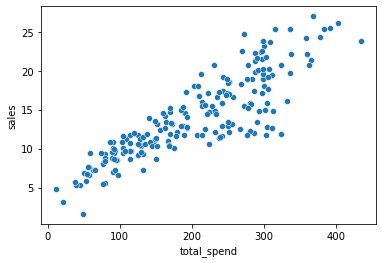

In [10]:
sns.scatterplot(y='sales',x='total_spend',data=df)

In [11]:
X=df[['total_spend']]
y=df['sales']

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
model.intercept_

4.243028216036331

In [16]:
model.coef_

array([0.04868788])

In [17]:
#R squared value
model.score(X,y)

0.7529246402599598

In [18]:
#Y pred
y_pred=model.predict(X)


In [19]:
#Residuals/errors
error=y_pred-y

In [20]:
rmse=np.sqrt(np.mean(error**2))
rmse

2.586932523445054

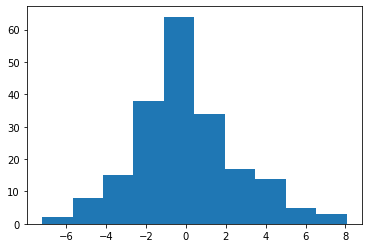

In [21]:
#checking normal distribution for residuals
plt.hist(error)
plt.show()

In [22]:
spend=200
predicted_sales=0.048*spend+4.24
predicted_sales

13.84

# multiple linear regression

In [23]:
df=pd.read_csv("Advertising.csv")

In [24]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [26]:
X=df.drop("sales",axis=1)
y=df['sales']

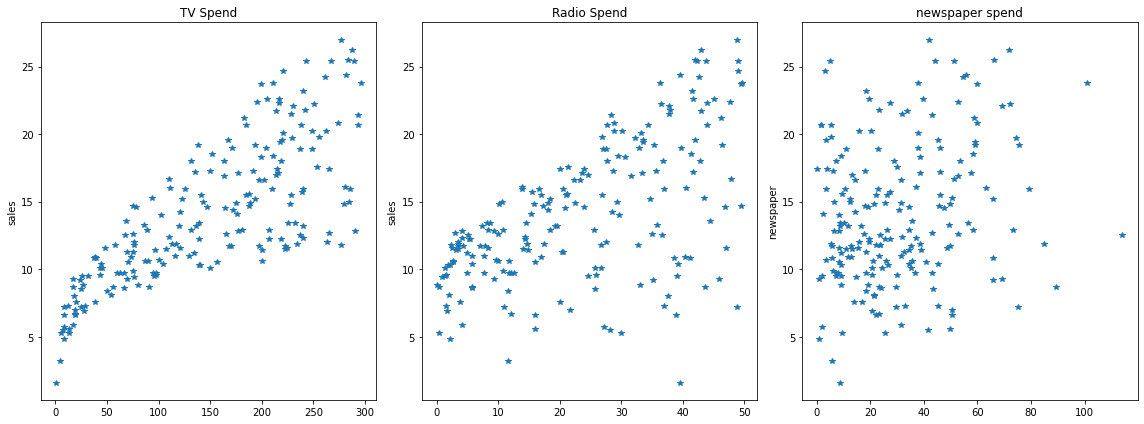

In [27]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'*')
axes[0].set_ylabel('sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'*')
axes[1].set_ylabel('sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'*')
axes[2].set_ylabel('newspaper')
axes[2].set_title('newspaper spend')
plt.tight_layout()

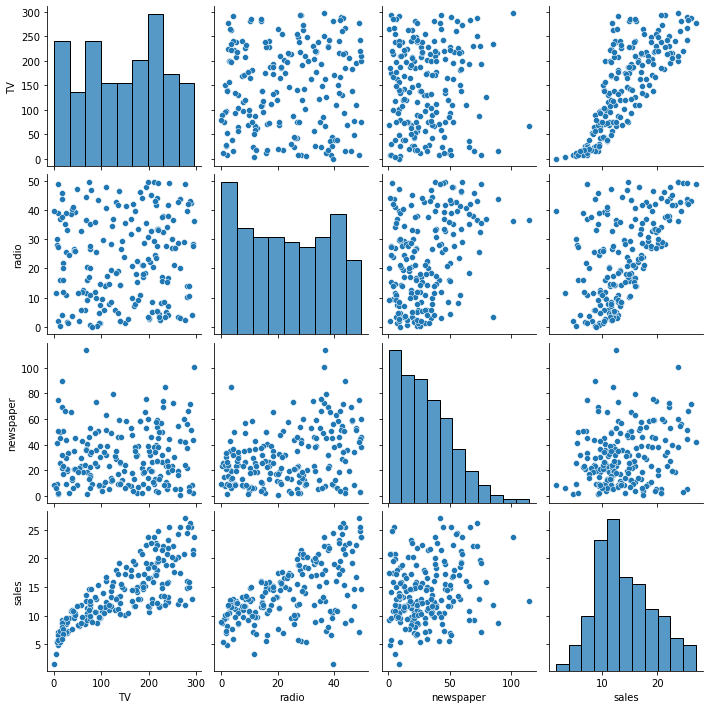

In [28]:
#relationship between features
sns.pairplot(df)

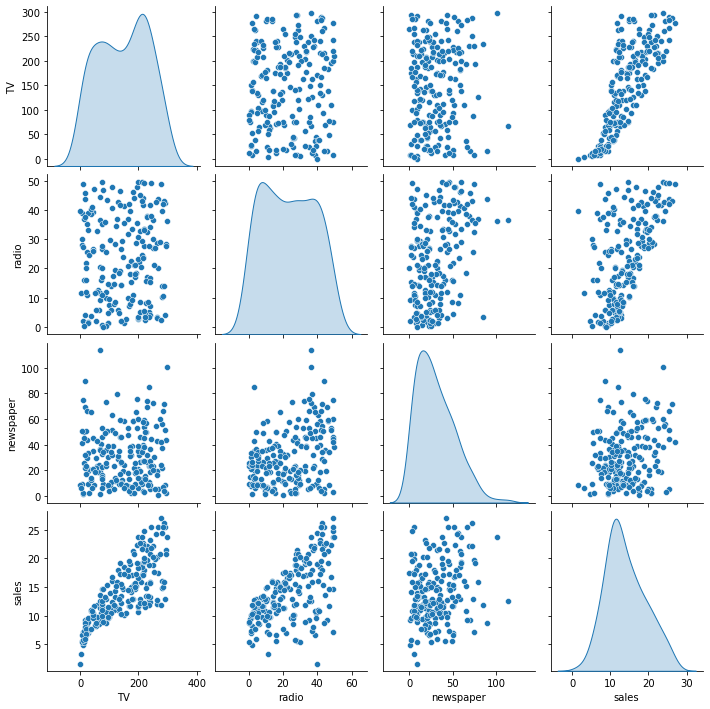

In [29]:
sns.pairplot(df,diag_kind='kde')